<a href="https://colab.research.google.com/github/9-coding/PyTorch/blob/main/16_custom_model_with_module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [162]:
import torch
import numpy as np

In [163]:
for c in [torch, np]:
  print(c.__version__)

2.2.1+cu121
1.25.2


In [164]:
!pip install --quiet torchvision
!pip install --quiet torchsummary

In [165]:
from torch.nn import Module, init, Linear, Parameter, MSELoss, ReLU
from torch import optim
import matplotlib.pyplot as plt
import torchvision
import torchsummary

# Data 생성부
- input
- output: x (tensor), y (tensor) = y_ideal + noise

In [195]:
def gen_xy():
  x = np.linspace(-10, 10, 100)
  y_ideal = 1.8 * x + 32.
  y = y_ideal + 8. * np.random.randn((100))

  return x, y, y_ideal

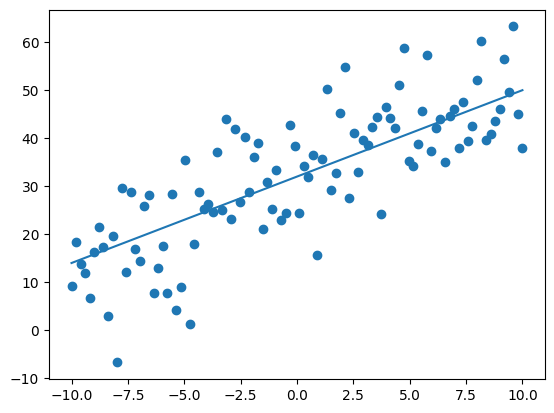

In [196]:
x, y, y_ideal = gen_xy()

plt.plot(x, y_ideal)
plt.scatter(x, y)

### tensor로 변환 (+shape)

In [197]:
x = torch.tensor(x).float()
y = torch.tensor(y).float()
x = x.reshape(-1,1)
y = y.reshape(-1,1)

print(x.shape, type(x))
print(y.shape, type(y))

torch.Size([100, 1]) <class 'torch.Tensor'>
torch.Size([100, 1]) <class 'torch.Tensor'>


# Model

In [198]:
class DsANN(Module):
  def __init__(self,
               n_in_f, # input vector의 차원 수
               n_out_f # output vector의 차원 수
               ):
    super().__init__()

    self.l0 = Linear(n_in_f, 32)
    self.relu0 = ReLU()
    self.l1 = Linear(32, 32)
    self.relu1 = ReLU()
    self.l2 = Linear(32, n_out_f)

    with torch.no_grad():
      init.constant_(self.l0.bias, 0.)
      init.xavier_uniform(self.l0.weight)

  def forward(self, x):
    x = self.l0(x)
    x = self.relu0(x)
    x = self.l1(x)
    x = self.relu1(x)
    y = self.l2(x)
    return y

## torch.nn.init 모듈
ANN을 구현할 때, 각 layer의 weight 와 bias를 초기화하는 방법을 제공함.

- 초기화는 ANN의 수렴 속도 및 학습 안정화에 매우 큰 영향을 줌.
- torch.nn.init는 일반적으로 사용되는 다양한 초기화 방법들이 구현되어 있음.

### `.uniform_(tensor, a=0., b=1.)`
- 지정된 parameters를 uniform distance로 초기화
- a와 b는 값의 범위를 지정하는데 사용됨: [a,b)

### `.normal_(tensor, mean=0., std=1.)`
- normal distribution으로 초기화.

### `.constant_(tensor, val=0.)`
- val 에 지정된 상수값으로 초기화.

### `.ones_() and .zeros_()`
- 0과 1로 초기화.

In [185]:
model = DsLinearModel(1,1)

for idx, c in enumerate(model.named_parameters()):
  print(idx, c)
print()

for idx, c in enumerate(model.parameters()):
  print(idx, c)

0 ('l0.weight', Parameter containing:
tensor([[-0.4062],
        [ 0.2838],
        [-0.2797],
        [-0.2363],
        [-0.1084],
        [ 0.2156],
        [ 0.2793],
        [-0.0907],
        [-0.2038],
        [-0.4196],
        [ 0.3934],
        [-0.3782],
        [ 0.3097],
        [ 0.0423],
        [ 0.3088],
        [-0.2585],
        [-0.0122],
        [-0.3665],
        [-0.2613],
        [ 0.2641],
        [-0.0624],
        [ 0.1837],
        [-0.2333],
        [ 0.2912],
        [-0.2721],
        [ 0.3893],
        [ 0.4056],
        [-0.3445],
        [ 0.3728],
        [-0.2528],
        [ 0.4010],
        [-0.4179]], requires_grad=True))
1 ('l0.bias', Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True))
2 ('l1.weight', Parameter containing:
tensor([[ 0.1593,  0.0999,  0.1311,  ..., -0.1550, -0.0476,  0.0380],
        [-0.0688,  0.0

<ipython-input-184-c344cfee1d2a>:12: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  init.xavier_uniform(self.l0.weight)


In [170]:
for idx, cl in enumerate(model.named_children()): # cl: child layer
  print(idx, cl)
print()

for idx, cl in enumerate(model.children()): # cl: child layer
  print(idx, cl)

0 ('l0', Linear(in_features=1, out_features=32, bias=True))
1 ('relu0', ReLU())
2 ('l1', Linear(in_features=32, out_features=32, bias=True))
3 ('relu1', ReLU())
4 ('l2', Linear(in_features=32, out_features=1, bias=True))

0 Linear(in_features=1, out_features=32, bias=True)
1 ReLU()
2 Linear(in_features=32, out_features=32, bias=True)
3 ReLU()
4 Linear(in_features=32, out_features=1, bias=True)


In [171]:
for idx, modu in enumerate(model.named_modules()):
  print(idx, modu)
print()

for idx, modu in enumerate(model.modules()):
  print(idx, modu)

0 ('', DsLinearModel(
  (l0): Linear(in_features=1, out_features=32, bias=True)
  (relu0): ReLU()
  (l1): Linear(in_features=32, out_features=32, bias=True)
  (relu1): ReLU()
  (l2): Linear(in_features=32, out_features=1, bias=True)
))
1 ('l0', Linear(in_features=1, out_features=32, bias=True))
2 ('relu0', ReLU())
3 ('l1', Linear(in_features=32, out_features=32, bias=True))
4 ('relu1', ReLU())
5 ('l2', Linear(in_features=32, out_features=1, bias=True))

0 DsLinearModel(
  (l0): Linear(in_features=1, out_features=32, bias=True)
  (relu0): ReLU()
  (l1): Linear(in_features=32, out_features=32, bias=True)
  (relu1): ReLU()
  (l2): Linear(in_features=32, out_features=1, bias=True)
)
1 Linear(in_features=1, out_features=32, bias=True)
2 ReLU()
3 Linear(in_features=32, out_features=32, bias=True)
4 ReLU()
5 Linear(in_features=32, out_features=1, bias=True)


In [186]:
pred = model(x)
pred

tensor([[ 5.1302e-01],
        [ 5.0126e-01],
        [ 4.8950e-01],
        [ 4.7774e-01],
        [ 4.6598e-01],
        [ 4.5422e-01],
        [ 4.4246e-01],
        [ 4.3070e-01],
        [ 4.1893e-01],
        [ 4.0717e-01],
        [ 3.9541e-01],
        [ 3.8365e-01],
        [ 3.7189e-01],
        [ 3.6013e-01],
        [ 3.4837e-01],
        [ 3.3661e-01],
        [ 3.2485e-01],
        [ 3.1308e-01],
        [ 3.0137e-01],
        [ 2.8989e-01],
        [ 2.7841e-01],
        [ 2.6693e-01],
        [ 2.5545e-01],
        [ 2.4397e-01],
        [ 2.3249e-01],
        [ 2.2102e-01],
        [ 2.0954e-01],
        [ 1.9806e-01],
        [ 1.8658e-01],
        [ 1.7510e-01],
        [ 1.6362e-01],
        [ 1.5214e-01],
        [ 1.4066e-01],
        [ 1.2918e-01],
        [ 1.1770e-01],
        [ 1.0623e-01],
        [ 9.5091e-02],
        [ 8.4103e-02],
        [ 7.3114e-02],
        [ 6.2126e-02],
        [ 5.0988e-02],
        [ 3.9157e-02],
        [ 2.7581e-02],
        [ 1

# Loss

In [188]:
loss_func = MSELoss()

l = loss_func(pred, y)
l

tensor(1242.8005, grad_fn=<MseLossBackward0>)

# Training Loop

In [187]:
def training_loop(
    x, y,
    model,
    lr,
    n_epochs,
):

  model.train()
  # model.eval()

  optimizer = optim.SGD(
    model.parameters(),
    lr = lr,
  )

  print(n_epochs)


  for epoch in range(n_epochs):
    pred = model(x)
    l = loss_func(pred, y)

    if torch.isinf(l).any(): # 무한대로 발산하면
      print('Error: diverge!')
      break

    optimizer.zero_grad()
    l.backward()
    optimizer.step()

    if epoch % 1000 == 0:
      print(f'Epoch {epoch}: Loss {float(l):0.4f}')

  return model

# Train

In [191]:
model = DsLinearModel(1,1)
model = training_loop(
    x, y,
    model,
    1e-3,
    7000,
)

<ipython-input-184-c344cfee1d2a>:12: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  init.xavier_uniform(self.l0.weight)


7000
Epoch 0: Loss 1250.5737
Epoch 1000: Loss 74.8099
Epoch 2000: Loss 73.2076
Epoch 3000: Loss 73.8614
Epoch 4000: Loss 72.3891
Epoch 5000: Loss 72.9672
Epoch 6000: Loss 70.6479


# Evaluation

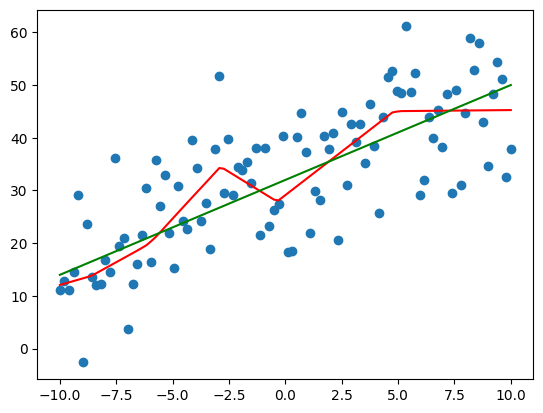

In [192]:
pred = model(x)
plt.scatter(x.detach().numpy(),y.detach().numpy())
plt.plot(x.detach().numpy(), pred.detach().numpy(), color='r')
plt.plot(x.detach().numpy(), y_label, color='g')

In [193]:
from torchsummary import summary

summary(model, (1,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 32]              64
              ReLU-2                   [-1, 32]               0
            Linear-3                   [-1, 32]           1,056
              ReLU-4                   [-1, 32]               0
            Linear-5                    [-1, 1]              33
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.01
----------------------------------------------------------------
